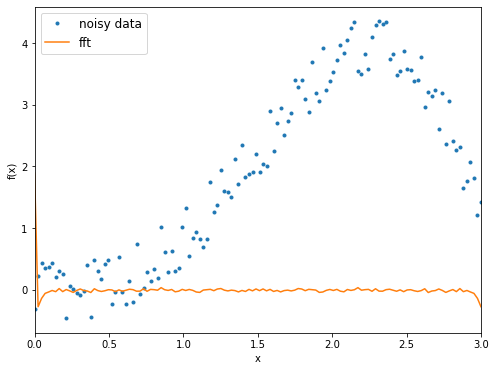

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from cmath import exp, pi

def dft1(y):
    '''
    This is a code to do decrete Fourier transform
    '''    
    N = len(y)
    c = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

def dft2(y):
    '''
    This is a improved code to do DFT
    '''
    x = np.asarray(y, dtype=float)        #N*1 array
    N = y.shape[0]
    n = np.arange(N)                      #1*N array
    k = n.reshape((N, 1))                 #N*1 array
    M = np.exp(-2j * np.pi * k * n / N)   #N*N matrix
    return np.dot(M, x)                   #N*1 array

def fft1(x):
    '''
    A recursive implementation of the 1D Cooley-Tukey FFT    
    '''
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    if N <= 16:  
        return dft2(x)
    else:
        X_even = fft1(x[::2])
        X_odd = fft1(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:int(N/2)] * X_odd,
                               X_even + factor[int(N/2):] * X_odd])
    
    

f = lambda x: x**2 * np.sin(x)  

left, right = 0,3
grain = 128

x = np.linspace(left, right, grain)
y = f(x) + np.random.rand(grain) - 0.5

fty = fft1(y).real/grain 

plt.figure(figsize = [8, 6])

plt.plot(x,y, '.', label='noisy data')
plt.plot(x,fty, label='fft')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim([left, right])
plt.legend(fontsize=12)

'''
Hmmm, so I do need an array size power-of-2 for fft1 to work, which is a major limitation. Also, it seems to have an 
interesting 'idea' of what an approximation is with this graph here. Strange. I'd thought it would do better at 
function approximation.
'''

plt.show()